# Metodología de la Simulación

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo

Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

1. Analíticamente.
2. Mediante simulación.

Analiticamente:
de la dsitribucion binomial obtenemos que la probabilidad, 3C2(0.5)^2(1-0.5)^1=3/8= 37.5%

In [1]:
X =numeor de soles

SyntaxError: invalid syntax (<ipython-input-1-4fcfc851ac5c>, line 1)

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

**PASO 2**. Formule la distribución de probabilidad de cada variable.


|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)|     0.5    |  0.5        |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)  |   0.5    |   0.5       |
|F(x)  |   0.5    |    1.0      |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|           |**Sol**|**Aguila**|
|-----------|-------|----------|
|f(x)       |    0.5   |    0.5      |
|F(x)       |    0.5   |      1.    |
|Intervalos |   0-0.49    |    0.5-1.0      |

**PASO 5**. Genere números aleatorios.

**PASO 6**. Simule un lanzamiento.

Si Número de caras = 2       

¿Aparecen dos caras? = **1**

Si Número de caras ≠ 2       

¿Aparecen dos caras? = **0**

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
def volados(n):
    caras = 0
    for i in range(n):
        u = random.uniform(0,1)
        if u <= 0.5:
            caras += 1
    return caras

In [4]:
def caras(m):
    favorable = 0
    if volados(3) == m:
        favorable +=1
    return favorable

In [5]:
def experimento(iteraciones):
    i = 0
    favorables=0
    Lista = []
    while i <= iteraciones:
        favorables = favorables + caras(2)
        i += 1
        probabilidad = favorables/i
        Lista.append(probabilidad)
    return Lista

In [6]:
exp = experimento(2000)

In [7]:
np.mean(exp)

0.3473963157225682

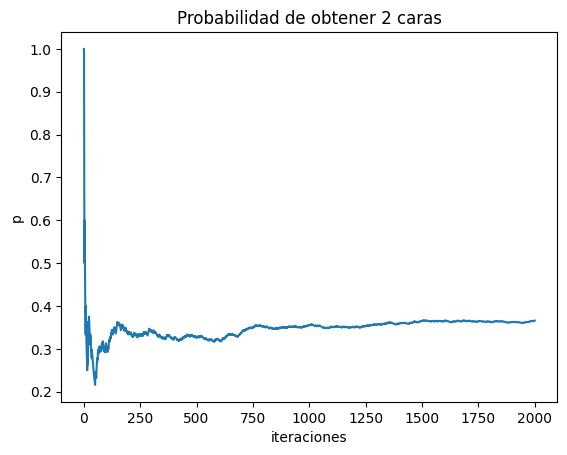

In [8]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad de obtener 2 caras')
plt.show()

**PASO 8**. Replique el modelo.

In [13]:
def simulacion_caras(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000)))
    return List

In [15]:
simulacion = simulacion_caras(50)

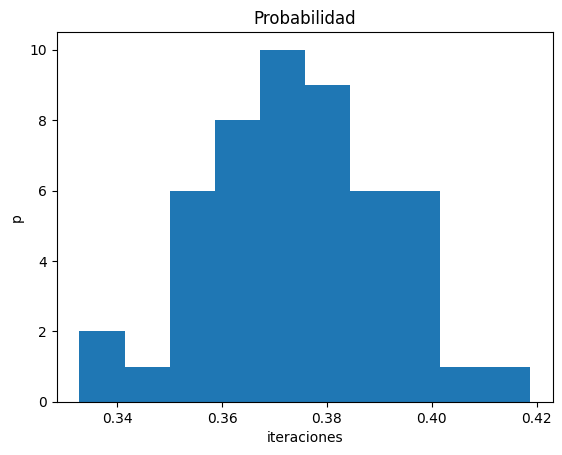

In [16]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación
estándar.

In [17]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

(0.3748250695968151, 0.00030184133410368906, 0.01737358149903724)

**PASO 10**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda
al aire con un nivel de confianza del $95 \%$.

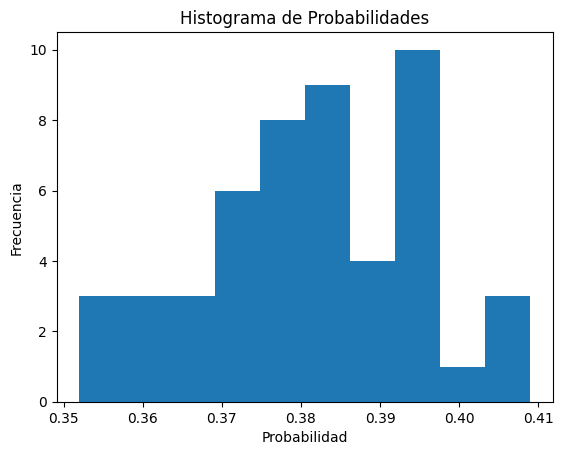

Probabilidad media: 0.38142000000000004
Desviación estándar: 0.014050039145852948
Intervalo de confianza al 95%: 0.37752552784126014 - 0.38531447215873993


In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Función para simular un lanzamiento de moneda
def lanzamiento_moneda():
    return random.uniform(0, 1) <= 0.5  # True si es cara, False si es cruz

# Función para simular tres lanzamientos y contar las caras
def simular_tres_lanzamientos():
    return sum(lanzamiento_moneda() for _ in range(3))

# Función para realizar el experimento de Monte Carlo
def experimento(iteraciones):
    favorables = 0
    probabilidad = []
    for i in range(1, iteraciones + 1):
        favorables += simular_tres_lanzamientos() == 2
        probabilidad.append(favorables / i)
    return probabilidad

# Paso 8: Replique el modelo
def replicar_modelo(repeticiones, iteraciones):
    resultados = []
    for _ in range(repeticiones):
        probabilidad = experimento(iteraciones)[-1]  # Probabilidad obtenida en la última iteración
        resultados.append(probabilidad)
    return resultados

# Parámetros
repeticiones = 50
iteraciones = 1000

# Simulación y gráfico del experimento
simulacion = replicar_modelo(repeticiones, iteraciones)
plt.hist(simulacion, bins=10)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades')
plt.show()

# Paso 9: Calcular la probabilidad y su desviación estándar
probabilidad_media = np.mean(simulacion)
varianza = np.var(simulacion)
desviacion_estandar = np.std(simulacion)

print("Probabilidad media:", probabilidad_media)
print("Desviación estándar:", desviacion_estandar)

# Paso 10: Calcular el intervalo de confianza al 95%
intervalo_confianza = 1.96 * desviacion_estandar / np.sqrt(repeticiones)
print("Intervalo de confianza al 95%:", probabilidad_media - intervalo_confianza, "-", probabilidad_media + intervalo_confianza)
